# STRING MATCHING ALGORITHMS


### CB.EN.U4CSE21450 HARECHARAN S 

## NAIVE

In [4]:
def naive_string_match(str_main,str_match):
    print(len (str_main))
    print((len(str_match)))
    print(len(str_main)-len(str_match)+1)
    for i in range(0,len(str_main)-len(str_match)+1):
        print("i=",i)
        print(str_main[i:i+len(str_match)])
        if str_main[i:i+len(str_match)]==str_match:
            return i
    return -1
naive_string_match("HelloWorld","rld")

10
3
8
i= 0
Hel
i= 1
ell
i= 2
llo
i= 3
loW
i= 4
oWo
i= 5
Wor
i= 6
orl
i= 7
rld


7

In [1]:
for i in range(4):
    print (i)

0
1
2
3


In [3]:
str1="helloworld"
print(str1[0:4])

hell


## boyer moore

In [4]:
def skip_table(str1):
    dict1 = {}
    for i in range(len(str1)-1):
        dict1[str1[i]] = len(str1)-i-1
    return dict1

def boyer_moore(str_main, str_match):
    l_main = len(str_main)
    l_match = len(str_match)
    dict1 = skip_table(str_match)
    i = 0

    while i <= l_main - l_match:
        j = l_match - 1
        while j >= 0 and str_main[i + j] == str_match[j]:
            j -= 1

        if j < 0:
            return i

        if str_main[i + j] in dict1:
            i += dict1[str_main[i + j]]
        else:
            i += 1

    return False

print(boyer_moore("ABCDEFG", "G"))


6


### k m p algorithm

In [ ]:
### 

In [5]:
def compute_lps(pattern):
    m = len(pattern)
    lps = [0] * m
    length = 0
    i = 1

    while i < m:
        if pattern[i] == pattern[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1

    return lps

def kmp_search(text, pattern):
    n = len(text)
    m = len(pattern)
    lps = compute_lps(pattern)

    i = 0
    j = 0

    while i < n:
        if pattern[j] == text[i]:
            i += 1
            j += 1

        if j == m:
            return True  
        elif i < n and pattern[j] != text[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1

    return False

text = "ABABABABABABABABABA"
pattern = "ABABA"
result = kmp_search(text, pattern)
print(result)


True


### rabin karp

In [6]:
def rabin_karp(text, pattern):
    n = len(text)
    m = len(pattern)
    prime = 101
    d = 256
    q = 10**9 + 7

    h = pow(d, m-1, q)
    p = 0
    t = 0

    for i in range(m):
        p = (d * p + ord(pattern[i])) % q
        t = (d * t + ord(text[i])) % q

    for i in range(n - m + 1):
        if p == t:
            if text[i:i+m] == pattern:
                return i

        if i < n - m:
            t = (d * (t - ord(text[i]) * h) + ord(text[i + m])) % q

            if t < 0:
                t += q

    return -1

text = "Hello, world!"
pattern = "world"
result = rabin_karp(text, pattern)
print(result)


7


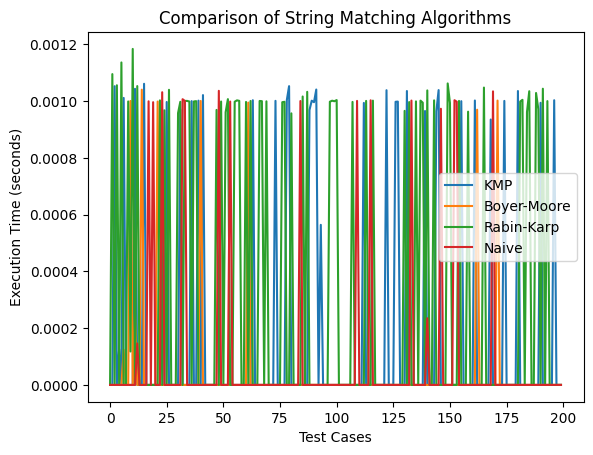

<Figure size 100x100 with 0 Axes>

In [30]:
import time
import random
import matplotlib.pyplot as plt

def generate_random_string(length):
    return ''.join(random.choice('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789') for _ in range(length))

def run_test_cases():
    kmp_times = []
    bm_times = []
    rk_times = []

    for _ in range(200):
        text_length = random.randint(100, 1000)
        pattern_length = random.randint(5, min(100, text_length // 2))

        text = generate_random_string(text_length)
        pattern = generate_random_string(pattern_length)

        start_time = time.time()
        kmp_result = kmp_search(text, pattern)
        kmp_time = time.time() - start_time
        kmp_times.append(kmp_time)

        start_time = time.time()
        bm_result = boyer_moore(text, pattern)
        bm_time = time.time() - start_time
        bm_times.append(bm_time)

        start_time = time.time()
        rk_result = rabin_karp(text, pattern)
        rk_time = time.time() - start_time
        rk_times.append(rk_time)

    return kmp_times, bm_times, rk_times

def plot_results(kmp_times, bm_times, rk_times):
    plt.plot(kmp_times, label='KMP')
    plt.plot(bm_times, label='Boyer-Moore')
    plt.plot(rk_times, label='Rabin-Karp')
    plt.xlabel('Test Cases')
    plt.ylabel('Execution Time (seconds)')
    plt.legend()
    plt.title('Comparison of String Matching Algorithms')
    plt.figure(figsize=(1,1))
    plt.show()

kmp_times, bm_times, rk_times = run_test_cases()

plot_results(kmp_times, bm_times, rk_times)


NameError: name 'bm_result' is not defined